# Classifiers Evaluation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.spatial
import warnings
import sklearn as sk
import operator
import numpy as np
import pickle

import sklearn.preprocessing as prep
import sklearn.pipeline as pl
import sklearn.metrics as mt
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import sklearn.tree as tree
import sklearn.svm as sv
import sklearn.neighbors as nei
import sklearn.decomposition as dc
import sklearn.neural_network as nn

warnings.simplefilter("ignore")

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

pd.__version__ #print which version of pandas you're using

'1.0.1'

## read in results

In [2]:
results = pd.read_csv('model_results.csv')
results.head()

,decision tree,random forest,ada boost,nearest neighbor,svc,neural network,logistic regression,label
0,1,1,1,0,1,1,1,1
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1


## Evaluate Classifiers

In [3]:
corr = results.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm', axis=None)

,decision tree,random forest,ada boost,nearest neighbor,svc,neural network,logistic regression,label
decision tree,1,0.820695,0.820695,0.549303,0.664327,0.565078,0.539875,0.412865
random forest,0.820695,1,1,0.586125,0.781729,0.67547,0.644687,0.466451
ada boost,0.820695,1,1,0.586125,0.781729,0.67547,0.644687,0.466451
nearest neighbor,0.549303,0.586125,0.586125,1,0.718566,0.603376,0.553805,0.312621
svc,0.664327,0.781729,0.781729,0.718566,1,0.747898,0.699045,0.396892
neural network,0.565078,0.67547,0.67547,0.603376,0.747898,1,0.871194,0.330528
logistic regression,0.539875,0.644687,0.644687,0.553805,0.699045,0.871194,1,0.31525
label,0.412865,0.466451,0.466451,0.312621,0.396892,0.330528,0.31525,1


In [5]:
count = []
results = pd.read_csv('model_results.csv')
data = results.drop('label', axis=1)
for i in range(len(results)):
    cnt = 0
    for col in data.columns:
        cnt += data[col][i]
    count.append(cnt)
results['count'] = count

In [5]:
results.head()

,decision tree,random forest,ada boost,nearest neighbor,svc,neural network,logistic regression,label,count
0,1,1,1,0,1,1,1,1,6
1,1,1,1,1,1,1,1,1,7
2,1,1,1,1,1,1,1,1,7
3,1,1,1,1,1,1,1,1,7
4,1,1,1,1,1,1,1,1,7


## Number of predicted = 1 vs. true value = 1

In [6]:
gr = results.groupby('count')
prec = []
for n, d in gr:
    print(n)
    lab = d['label']
    cnt = 0.0
    for i in lab:
        if i == 1:
            cnt += 1
    print(len(d))
    print(cnt/len(d))
    prec.append(cnt/len(d))
    print()


0
117
0.0

1
31
0.0

2
56
0.0

3
44
0.09090909090909091

4
75
0.13333333333333333

5
39
0.6410256410256411

6
208
0.8317307692307693

7
9430
0.9084835630965006



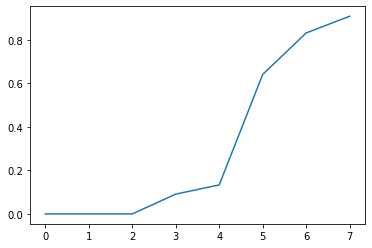

In [7]:
plt.plot(range(8), prec)

## Performance Comparison

In [3]:
def precision(col, label):
    tp = 0.0
    t = 0
    for i in range(len(col)):
        if col[i] == 0:
            t += 1
            if col[i] == label[i]:
                tp += 1
    return round(tp/t * 100, 2)

def recall(col, label):
    tp = 0.0
    t = 0
    for i in range(len(col)):
        if label[i] == 0:
            t += 1
            if col[i] == label[i]:
                tp += 1
    return round(tp/t * 100, 2)

def accuracy(col, label):
    t = 0
    for i in range(len(col)):
        if col[i] == label[i]:
            t += 1
    return round(t/len(label) * 100, 2)

In [6]:
data.head()

,decision tree,random forest,ada boost,nearest neighbor,svc,neural network,logistic regression
0,1,1,1,0,1,1,1
1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1


In [59]:
name = []
prec = []
reca = []
accu = []
for n in data.columns:
    name.append(n)
    prec.append(precision(results[n], results['label']))
    reca.append(recall(results[n], results['label']))
    accu.append(accuracy(results[n], results['label']))

In [60]:
performance = pd.DataFrame([name, prec, reca, accu])
performance = performance.transpose()
performance.columns = ['Algorithm', 'Precision', 'Recall', 'Accuracy']
performance.head(7)

,Algorithm,Precision,Recall,Accuracy
0,decision tree,74.34,27.52,89.99
1,random forest,97.73,24.73,90.74
2,ada boost,97.73,24.73,90.74
3,nearest neighbor,68.32,18.02,88.97
4,svc,92.22,19.41,89.96
5,neural network,95.76,12.94,89.3
6,logistic regression,93.67,12.12,89.17


# Integration

## Read data

In [9]:
df = pd.read_csv('numerical.csv')
df.head()

,EMPLOYMENT_END_DATE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,...,label,WAGE_LEVEL_1,WAGE_LEVEL_2,WAGE_LEVEL_3,WAGE_LEVEL_4,CBA,DBA,OES,SCA,OTHER_PW_SOURCE
0,19,1,1,0,0,0,0,0,1,59197.0,...,0,1,0,0,0,0,0,1,0,0
1,19,2,1,0,0,0,0,0,1,76502.0,...,0,0,1,0,0,0,0,1,0,0
2,20,1,1,0,0,0,0,0,1,90376.0,...,0,0,0,1,0,0,0,1,0,0
3,18,1,0,0,0,0,1,0,1,116605.0,...,0,0,0,1,0,0,0,1,0,0
4,18,1,1,0,0,0,0,0,1,59405.0,...,0,0,0,1,0,0,0,1,0,0


In [42]:
test_set = df.sample(n=10000)
print(df.shape)
print(test_set.shape)
g = test_set.groupby('label')
for n, s in g:
    print(n, len(s))
test_features = test_set.drop('label', axis = 1)
test_labels = test_set['label']
test_features.head()

(1092830, 26)
(10000, 26)
0 1196
1 8804


,EMPLOYMENT_END_DATE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,...,LABOR_CON_AGREE,WAGE_LEVEL_1,WAGE_LEVEL_2,WAGE_LEVEL_3,WAGE_LEVEL_4,CBA,DBA,OES,SCA,OTHER_PW_SOURCE
169436,19,1,1,0,0,0,0,0,1,118082.0,...,0,0,0,0,1,0,0,1,0,0
714319,21,1,1,0,0,0,0,0,1,102669.0,...,1,0,1,0,0,0,0,1,0,0
746856,21,1,0,0,0,0,1,0,1,132080.0,...,0,0,0,1,0,0,0,1,0,0
472784,20,1,0,1,0,0,0,0,1,62650.0,...,1,1,0,0,0,0,0,0,0,1
931310,21,1,1,0,0,0,0,0,1,65270.0,...,0,1,0,0,0,0,0,0,0,1


In [13]:
dt = pickle.load(open('decision_tree.sav', 'rb'))
rf = pickle.load(open('random_forest.sav', 'rb'))
knn = pickle.load(open('knn.sav', 'rb'))
lr = pickle.load(open('lr.sav', 'rb'))
svm = pickle.load(open('svc.sav', 'rb'))
mlp = pickle.load(open('neural_net.sav', 'rb'))
ada = pickle.load(open('ada_boost.sav', 'rb'))

In [14]:
svm = pl.Pipeline(memory=None,
         steps=[('scaler',
                 prep.StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 dc.PCA(copy=True, iterated_power='auto', n_components=24,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svc',
                 sv.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='poly', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [15]:
def balance_class(d, size=5000):
    gr = d.groupby('label')
    not_cert = pd.DataFrame()
    cert = pd.DataFrame()
    for name, data in gr:
        if name == 0:
            not_cert = data.sample(n = size)
        else:
            cert = data.sample(n = size)
    frames = [cert, not_cert]
    new_df = shuffle(pd.concat(frames, axis=0, sort=False, ignore_index=True))
    new_df = new_df.reset_index(drop=True)
    return new_df

bal_df = balance_class(df)
bal_df.head()

def split_label(d):
    labels = d['label']
    features = d.drop('label', axis=1)
    return labels, features

In [16]:
def print_report(data, model):
    labels, features = split_label(data)
    pred = ms.cross_val_predict(model, features, labels, cv = 5)
    print(mt.classification_report(labels, pred))
    return pred

def store_model(clf, fname):
    final_model = clf
    filename = fname + '.sav'
    pickle.dump(final_model, open(filename, 'wb'))
    print('stored ' + fname)

In [17]:
def best_param(feature, label, model, grid):
    # determine the best parameter
    model_grid = ms.RandomizedSearchCV(cv = 2, param_distributions = grid, estimator = model, n_iter=3)
    model_grid = model_grid.fit(feature, label)
    print(model_grid.best_params_)
    
    # cross validation to evaluate best parameters
    ac = ms.cross_val_score(model_grid, feature, label, cv=5, scoring='accuracy')
    acc = np.array([x for x in ac if not np.isnan(x)])
    print("On Balanced Data")
    print("Cross Validation Accuracy = " + str(acc))
    print("Average Accuracy = " + str(acc.mean()))

    return model_grid.best_params_

## Voting Classifier

In [18]:
from sklearn.ensemble import VotingClassifier

In [36]:
estimators = [('dt', dt), ('rf', rf), ('mlp', mlp),
              ('knn', knn), ('lr', lr), ('ada', ada), ('svm', svm)]


def voting_train(data):
    label, feature = split_label(data)
    vote_clf = VotingClassifier(estimators=estimators)
    grid = {
        'voting': ['hard', 'soft'],
        'flatten_transform': [True, False]
    }
    param = best_param(feature, label, vote_clf, grid)
    vote_clf = VotingClassifier(estimators=estimators, voting=param['voting'],
                               flatten_transform=param['flatten_transform'])
    return vote_clf

vote_clf = voting_train(bal_df)

{'voting': 'hard', 'flatten_transform': True}
On Balanced Data
Cross Validation Accuracy = [0.651  0.663  0.678  0.638  0.6555]
Average Accuracy = 0.6571


In [43]:
pred_v = print_report(test_set, vote_clf)
store_model(vote_clf, 'voting')
print('model stored')

              precision    recall  f1-score   support

           0       0.99      0.21      0.35      1196
           1       0.90      1.00      0.95      8804

    accuracy                           0.91     10000
   macro avg       0.95      0.61      0.65     10000
weighted avg       0.91      0.91      0.88     10000

stored voting
model stored


In [44]:
test_labels = list(test_labels)
print(accuracy(pred_v, test_labels))
print(precision(pred_v, test_labels))
print(recall(pred_v, test_labels))

90.59
99.23
21.49


## Stacking Classifier

In [39]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
def stacking_train(data):
    label, feature = split_label(data)
    stack_clf = StackingClassifier(estimators=estimators)
    grid = {
        'stack_method': ['auto', 'predict_proba', 'decision_function', 'predict'],
        'final_estimator': [tree.DecisionTreeClassifier(), RandomForestClassifier()],
        'passthrough': [True, False],
        'cv': range(1,10,3)
    }
    param = best_param(feature, label, stack_clf, grid)
    stack_clf = StackingClassifier(estimators=estimators, 
                                   final_estimator=param['final_estimator'], 
                                   stack_method=param['stack_method'], 
                                   passthrough=param['passthrough'], cv=param['cv'])
    return stack_clf

stack_clf = stacking_train(bal_df)

{'stack_method': 'predict', 'passthrough': True, 'final_estimator': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'cv': 4}
On Balanced Data
Cross Validation Accuracy = [0.585 0.657]
Average Accuracy = 0.621


In [57]:
pred = print_report(test_set, stack_clf)
store_model(stack_clf, 'stacking')
print('model stored')

              precision    recall  f1-score   support

           0       0.49      0.29      0.36      1196
           1       0.91      0.96      0.93      8804

    accuracy                           0.88     10000
   macro avg       0.70      0.62      0.65     10000
weighted avg       0.86      0.88      0.86     10000

stored stacking
model stored


In [58]:
print(accuracy(pred, test_labels))
print(precision(pred, test_labels))
print(recall(pred, test_labels))

87.85
48.66
28.93


In [61]:
name.append('voting')
name.append('stacking')
accu.append(accuracy(pred_v, test_labels))
accu.append(accuracy(pred, test_labels))
prec.append(precision(pred_v, test_labels))
prec.append(precision(pred, test_labels))
reca.append(recall(pred_v, test_labels))
reca.append(recall(pred, test_labels))

In [62]:
performance = pd.DataFrame([name, prec, reca, accu])
performance = performance.transpose()
performance.columns = ['Algorithm', 'Precision', 'Recall', 'Accuracy']
performance.head(9)

,Algorithm,Precision,Recall,Accuracy
0,decision tree,74.34,27.52,89.99
1,random forest,97.73,24.73,90.74
2,ada boost,97.73,24.73,90.74
3,nearest neighbor,68.32,18.02,88.97
4,svc,92.22,19.41,89.96
5,neural network,95.76,12.94,89.3
6,logistic regression,93.67,12.12,89.17
7,voting,99.23,21.49,90.59
8,stacking,48.66,28.93,87.85
